In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn 


In [11]:
df=pd.read_excel('hourly-dataset_without-night-hrs.xlsx')

In [12]:
df

,Random,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverter),Unnamed: 13
0,0.660692,2016-02-01,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00,NaN,277.0
1,0.417700,2016-02-01,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29,NaN,NaN
2,0.284691,2016-02-01,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00,NaN,NaN
3,0.449221,2016-02-01,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75,NaN,NaN
4,0.314341,2016-02-01,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,0.503809,2017-10-28,13,1.00,10.00,4.50,0.85,75.68,14.64,29.14,29.93,945.75,NaN,NaN
7532,0.505865,2017-10-28,14,1.00,10.00,4.72,-0.50,69.04,12.76,29.14,29.93,728.50,NaN,NaN
7533,0.317315,2017-10-28,15,1.00,10.00,4.18,-0.04,74.60,12.16,29.14,29.93,338.50,NaN,NaN
7534,0.417184,2017-10-28,16,1.00,10.00,3.77,0.00,75.64,8.28,29.16,29.95,126.78,NaN,NaN


In [13]:
se=df.reset_index()['Solar energy']

In [14]:
se

0          0.00
1         84.29
2        531.00
3        923.75
4       1947.75
         ...   
7531     945.75
7532     728.50
7533     338.50
7534     126.78
7535      20.49
Name: Solar energy, Length: 7536, dtype: float64

In [15]:
import matplotlib.pyplot as plt

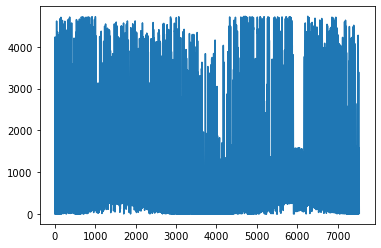

In [16]:
se.plot()
plt.show()

In [10]:
se.value_counts()

0.00       277
675.50       5
4711.00      5
922.75       4
500.75       4
          ... 
1433.25      1
573.00       1
4181.75      1
3323.75      1
29.00        1
Name: Solar energy, Length: 6231, dtype: int64

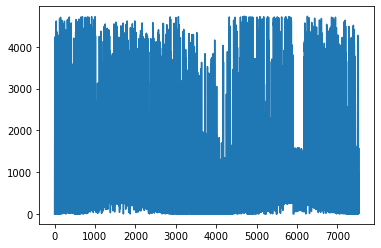

In [11]:
plt.plot(se)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [13]:
se=scaler.fit_transform(np.array(se).reshape(-1,1))

In [14]:
se

array([[0.        ],
       [0.01780806],
       [0.11218507],
       ...,
       [0.07151534],
       [0.02678498],
       [0.00432895]])

In [15]:
se.shape

(7536, 1)

In [16]:
trs=int(len(se)*0.75)
ts=len(se)-trs

In [17]:
trs,ts

(5652, 1884)

In [18]:
train=se[0:trs]
test=se[trs:]

In [19]:
train.shape

(5652, 1)

In [20]:
test.shape

(1884, 1)

In [21]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
X_train,Y_train=create_dataset(train,9)

In [23]:
X_train[0]

array([0.        , 0.01780806, 0.11218507, 0.19516189, 0.41150372,
       0.75254846, 0.89505097, 0.8267047 , 0.67379707])

In [24]:
Y_train[0]

0.3565731791052659

In [25]:
X_test,Y_test=create_dataset(test,9)

In [26]:
X_test.shape

(1874, 9)

In [27]:
X_train.shape

(5642, 9)

In [28]:
Y_test.shape

(1874,)

In [29]:
Y_train.shape

(5642,)

# Adding extra column which is required for LSTM

In [30]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
X_train.shape

(5642, 9, 1)

In [32]:
X_test.shape

(1874, 9, 1)

# Model Definition

In [33]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [34]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(9,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
177/177 [==============================] - 37s 15ms/step - loss: 0.1139 - val_loss: 0.0384
Epoch 2/100
177/177 [==============================] - 1s 8ms/step - loss: 0.0265 - val_loss: 0.0187
Epoch 3/100
177/177 [==============================] - 2s 8ms/step - loss: 0.0169 - val_loss: 0.0151
Epoch 4/100
177/177 [==============================] - 1s 8ms/step - loss: 0.0164 - val_loss: 0.0171
Epoch 5/100
177/177 [==============================] - 2s 9ms/step - loss: 0.0170 - val_loss: 0.0137
Epoch 6/100
177/177 [==============================] - 1s 8ms/step - loss: 0.0154 - val_loss: 0.0143
Epoch 7/100
177/177 [==============================] - 1s 8ms/step - loss: 0.0155 - val_loss: 0.0161
Epoch 8/100
177/177 [==============================] - 1s 8ms/step - loss: 0.0153 - val_loss: 0.0139
Epoch 9/100
177/177 [==============================] - 2s 8ms/step - loss: 0.0149 - val_loss: 0.0133
Epoch 10/100
177/177 [==============================] - 1s 8ms/step - loss: 0.0149 - val_

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [38]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

2152.3294143767835

In [40]:
math.sqrt(mean_squared_error(Y_test,test_predict))

2324.7553712577683

In [41]:
inp=test[-9:].reshape(1,-1)

In [42]:
inp

array([[0.15364707, 0.18671103, 0.33269952, 0.18047853, 0.19980986,
        0.15391116, 0.07151534, 0.02678498, 0.00432895]])

In [43]:
inp.shape

(1, 9)

In [44]:
inp[0]

array([0.15364707, 0.18671103, 0.33269952, 0.18047853, 0.19980986,
       0.15391116, 0.07151534, 0.02678498, 0.00432895])

In [45]:
temp=list(inp)
temp

[array([0.15364707, 0.18671103, 0.33269952, 0.18047853, 0.19980986,
        0.15391116, 0.07151534, 0.02678498, 0.00432895])]

In [46]:
temp=temp[0].tolist()

In [47]:
temp

[0.15364707125125443,
 0.18671103364495856,
 0.3326995193577352,
 0.18047852955157662,
 0.19980985580732055,
 0.15391116040775366,
 0.0715153435799926,
 0.026784978608778324,
 0.004328949453335446]

In [48]:
t=np.array(temp)

In [49]:
t.shape

(9,)

In [50]:
t=t.reshape(-1,9)

In [51]:
t.shape

(1, 9)

In [52]:
t=t.reshape(1,9,1)

In [53]:
t.shape

(1, 9, 1)

In [54]:
pr=model.predict(t,verbose=0)

In [55]:
pr[0][0]

0.016548283

In [56]:
temp=temp[0:9]

In [57]:
temp.append(pr[0][0])

In [58]:
temp

[0.15364707125125443,
 0.18671103364495856,
 0.3326995193577352,
 0.18047852955157662,
 0.19980985580732055,
 0.15391116040775366,
 0.0715153435799926,
 0.026784978608778324,
 0.004328949453335446,
 0.016548283]

In [59]:
n=np.array(temp)

In [60]:
n=n.reshape(-1,1)

In [61]:
n.shape

(10, 1)

In [62]:
p=scaler.inverse_transform(n)

In [63]:
p

array([[ 727.25      ],
       [ 883.75      ],
       [1574.75      ],
       [ 854.25      ],
       [ 945.75      ],
       [ 728.5       ],
       [ 338.5       ],
       [ 126.78      ],
       [  20.49      ],
       [  78.32716239]])

In [64]:
day_new=np.arange(1,9)
day_pred=np.arange(9,10)

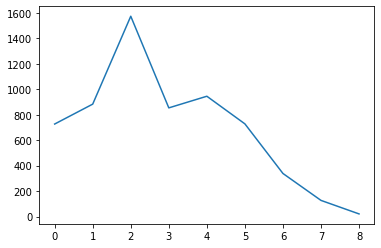

In [65]:
plt.plot(p[0:9])
plt.plot(p[9])